In [7]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [8]:
db = mysql.connector.connect(
            host = 'localhost',
            user = 'root',
            passwd = '881510811',
            database = 'iphone_price_scraping'
        ) # Create connection

dbcursor = db.cursor() # Create cursor

# Prepare SQL query to READ a record into the database.
sql = "SELECT * FROM phone_price"

# Execute the SQL command
dbcursor.execute(sql)

# Fetch all the rows in a list of lists.
results = dbcursor.fetchall()

dbcursor.close() # Close cursor
db.close() # Close connection

results = pd.DataFrame(results, columns=['phone', 'memory', 'color', 'state', 'daytime', 'price'])

# results = results[(results['daytime']>=pd.Timestamp(2020, 12, 6)) & (results['daytime']<=pd.Timestamp(2020, 12, 8))] 

In [9]:
# Empty dataframe with same characteristics as the results one
empty_df = pd.DataFrame({'phone': pd.Series([], dtype='str'),
                   'memory': pd.Series([], dtype='int64'),
                   'color': pd.Series([], dtype='str'),
                   'state': pd.Series([], dtype='str'),
                   'daytime': pd.Series([], dtype='datetime64[ns]'),
                   'price': pd.Series([], dtype='float64')})

In [10]:
def plot(df, phone, memory, color):
    
    # Select only the phones that match characteristics
    dff = df[(df['phone'].isin([phone])) & (df['memory'].isin([memory])) & df['color'].isin([color])]
    
    # Compare to empty dataset to see make sure it is not empty. If it is we exit
    if dff.equals(empty_df):
        return 
    
    # Separate by states
    stallone = dff[dff['state'] == 'Stallone']
    correcto = dff[dff['state'] == 'Correcto']
    buen_estado = dff[dff['state'] == 'Buen estado']
    muy_bueno = dff[dff['state'] == 'Muy bueno']
    impecable = dff[dff['state'] == 'Impecable']
    
    # Create the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
    axes.set_title(f'{phone} {memory} {color}')
    
    # Create the plot for each state and plot them in same figure
    stallone.plot(kind='line',x='daytime',y='price',color='darkred',marker='.', ax=axes, label='Stallone')
    correcto.plot(kind='line',x='daytime',y='price',color='orangered',marker='.', ax=axes, label='Correcto')
    buen_estado.plot(kind='line',x='daytime',y='price',color='gold',marker='.', ax=axes, label='Buen estado')
    muy_bueno.plot(kind='line',x='daytime',y='price',color='greenyellow',marker='.', ax=axes, label='Muy bueno')
    impecable.plot(kind='line',x='daytime',y='price',color='green',marker='.', ax=axes, label='Impecable')

*********************************************************iPhone XR 64*********************************************************


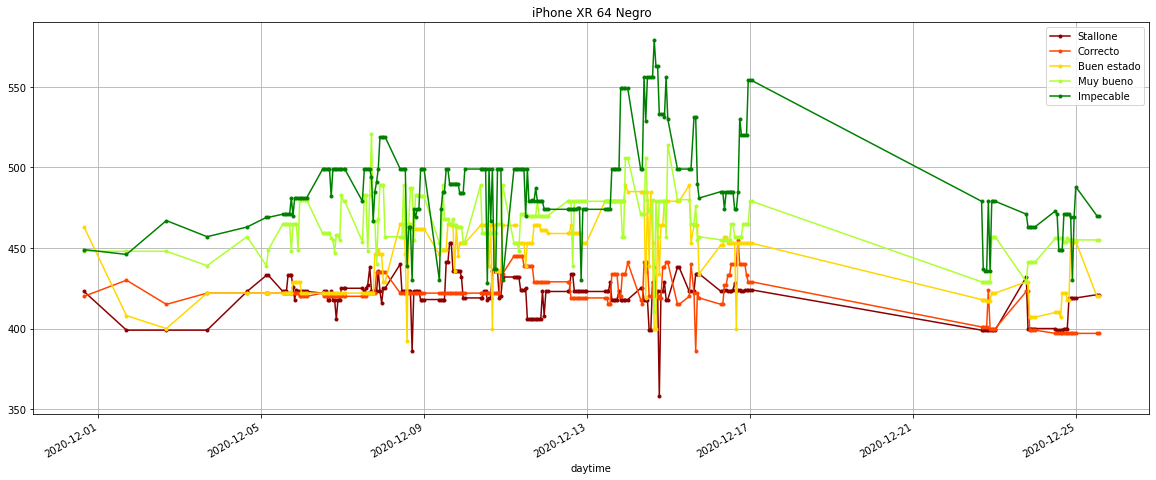

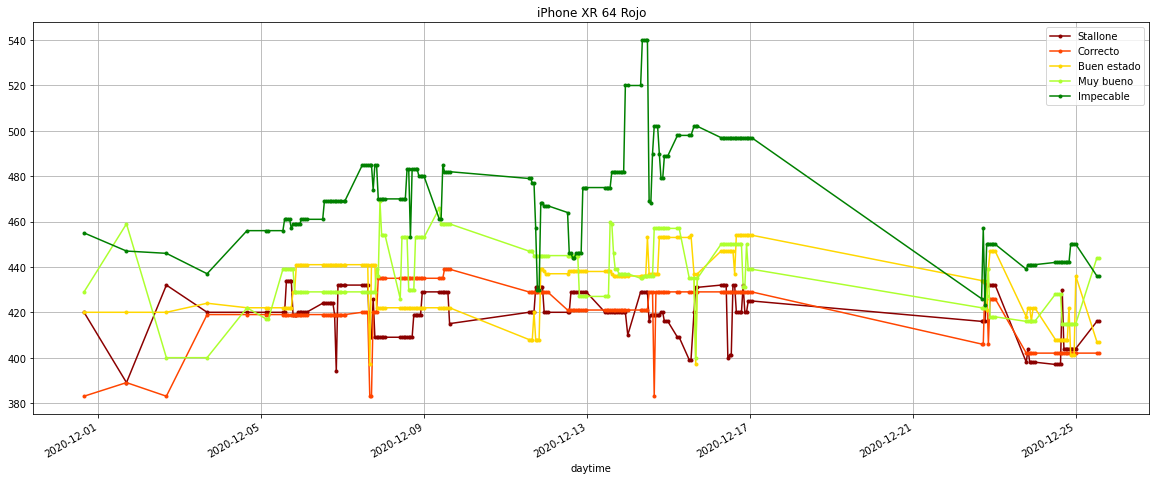

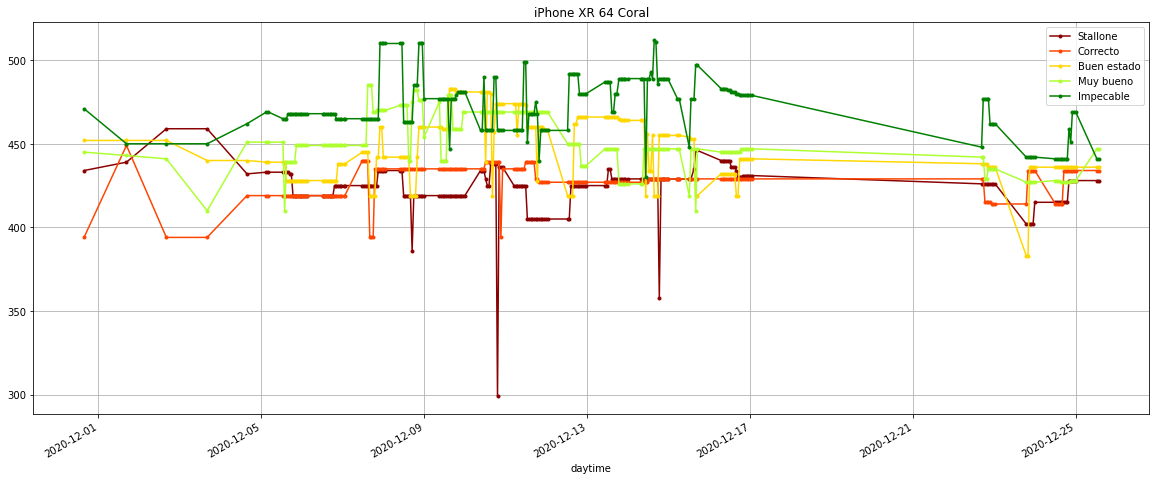

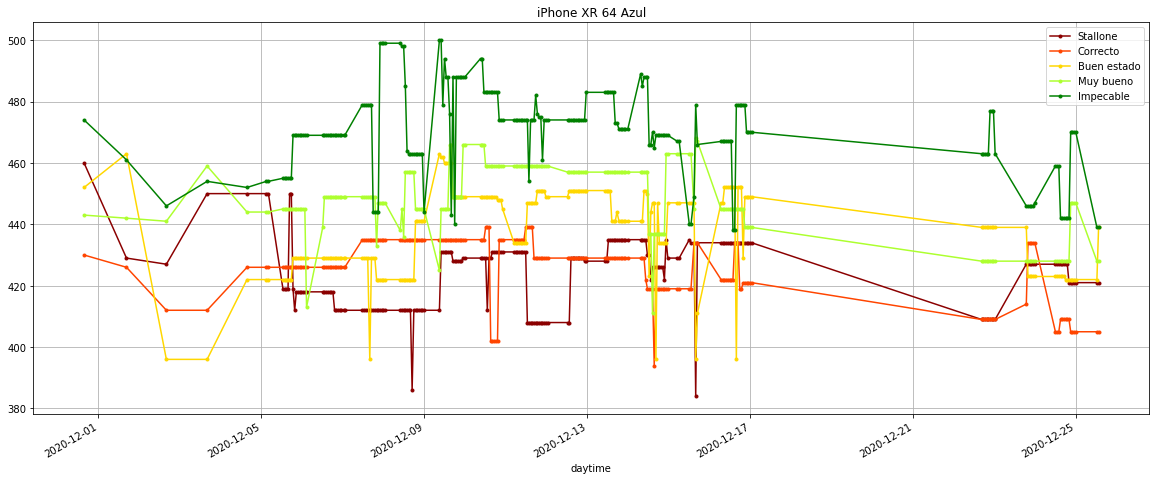

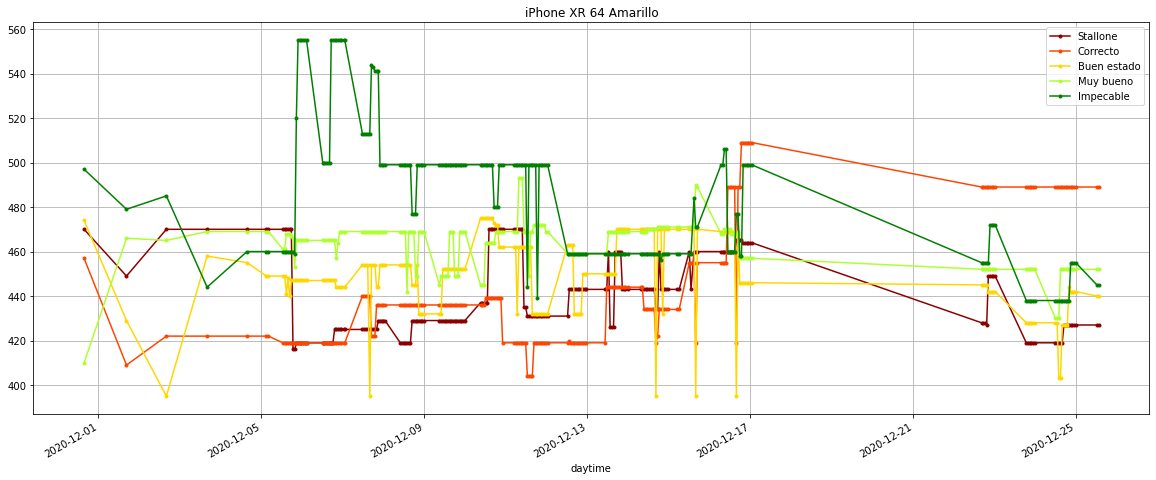

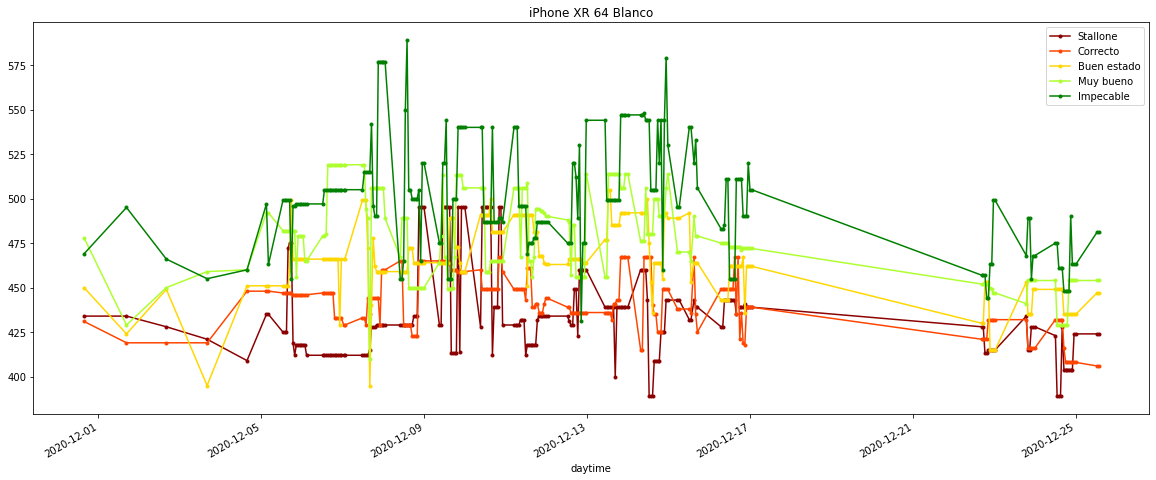

*********************************************************iPhone XR 128*********************************************************


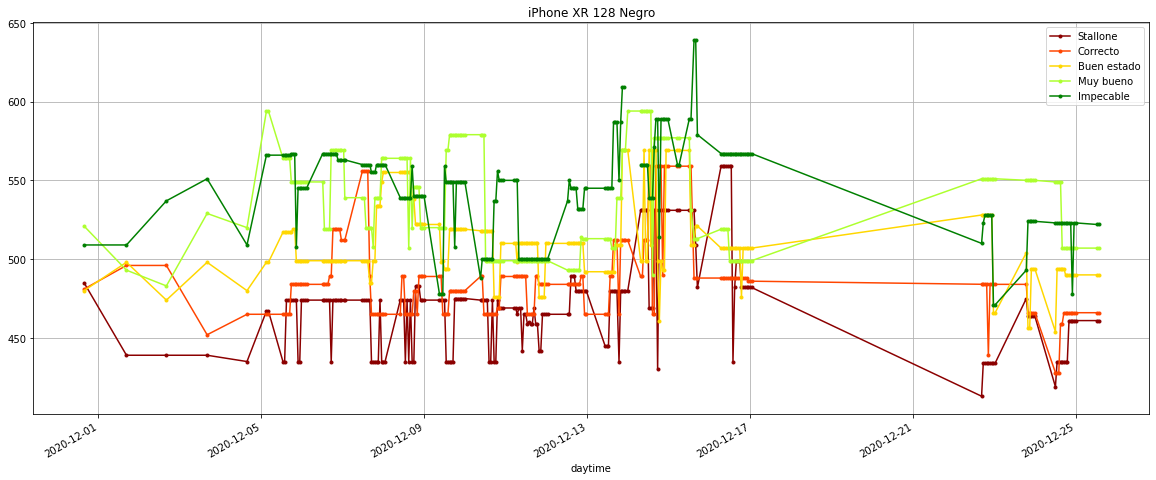

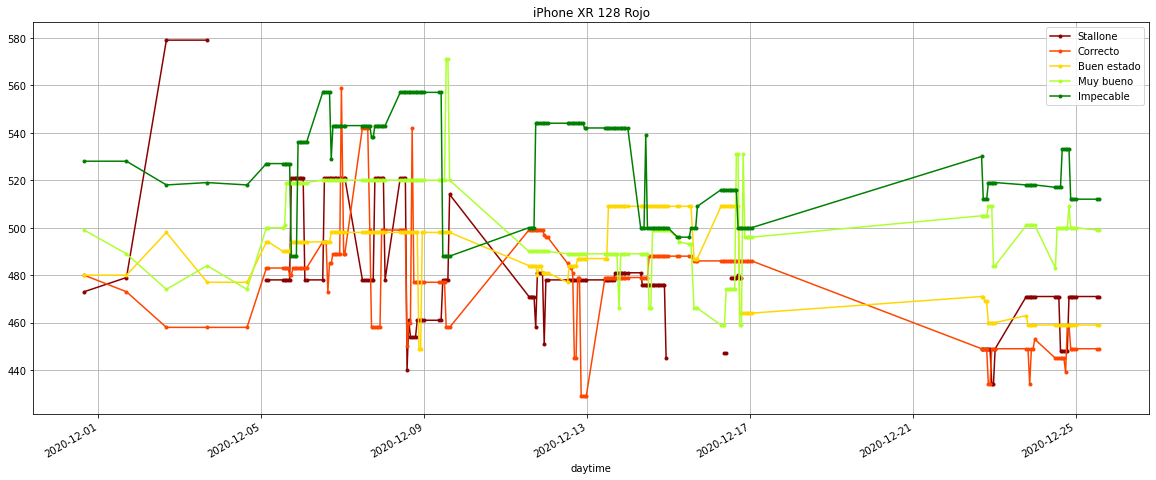

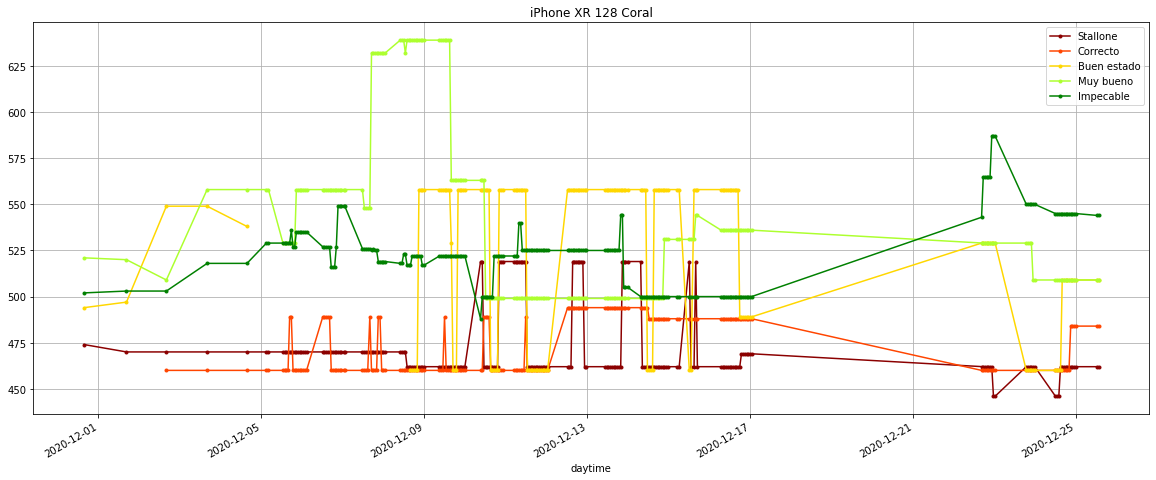

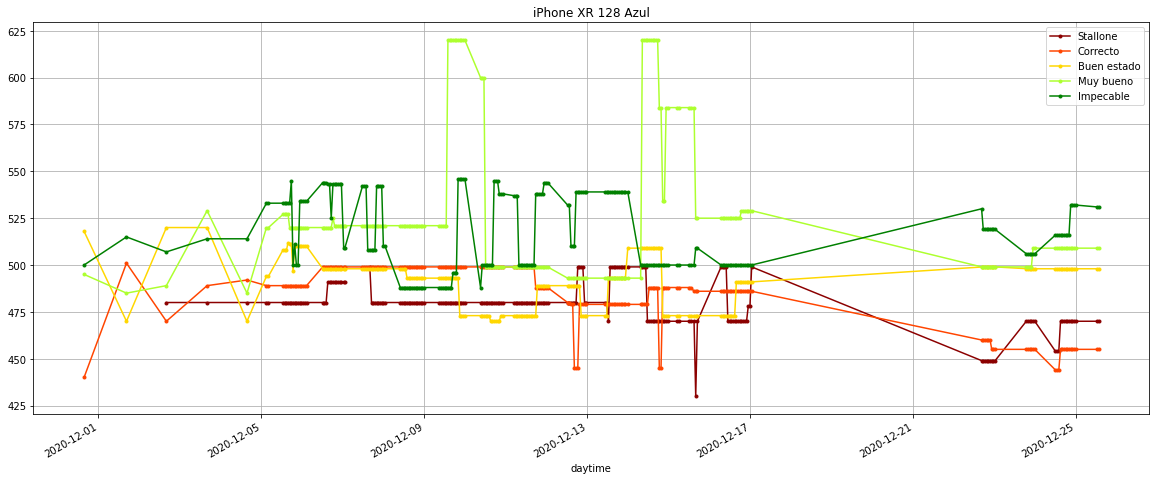

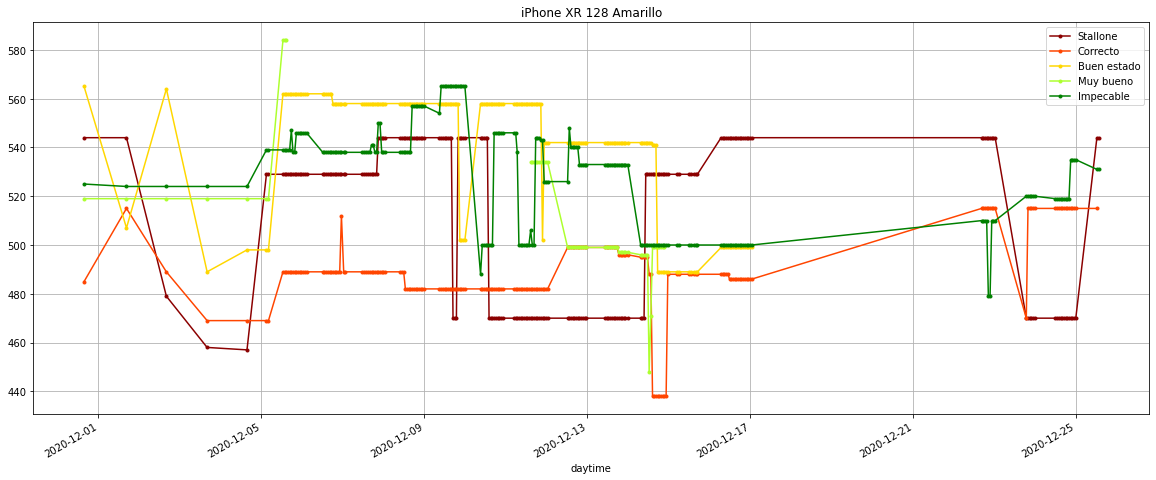

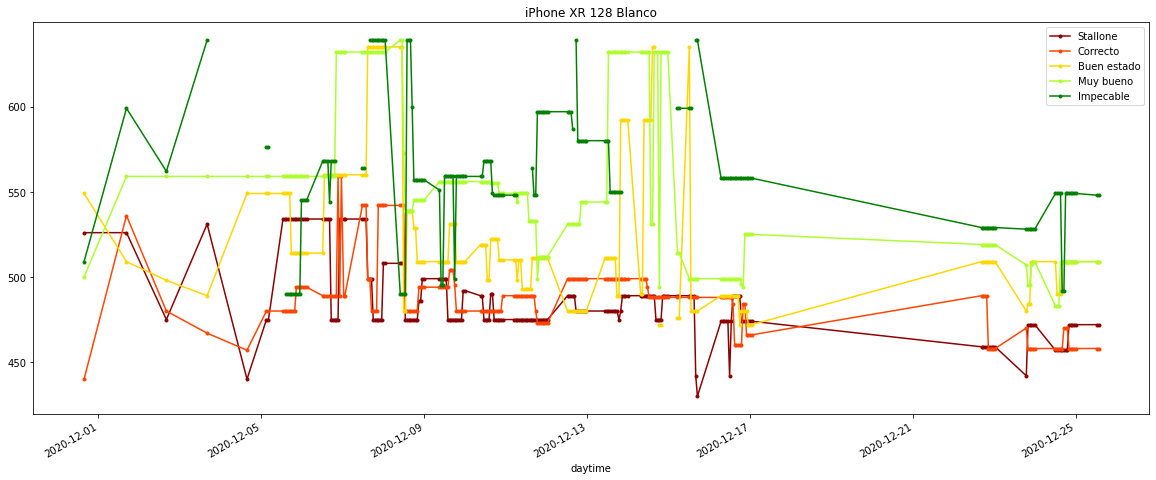

*********************************************************iPhone XR 256*********************************************************


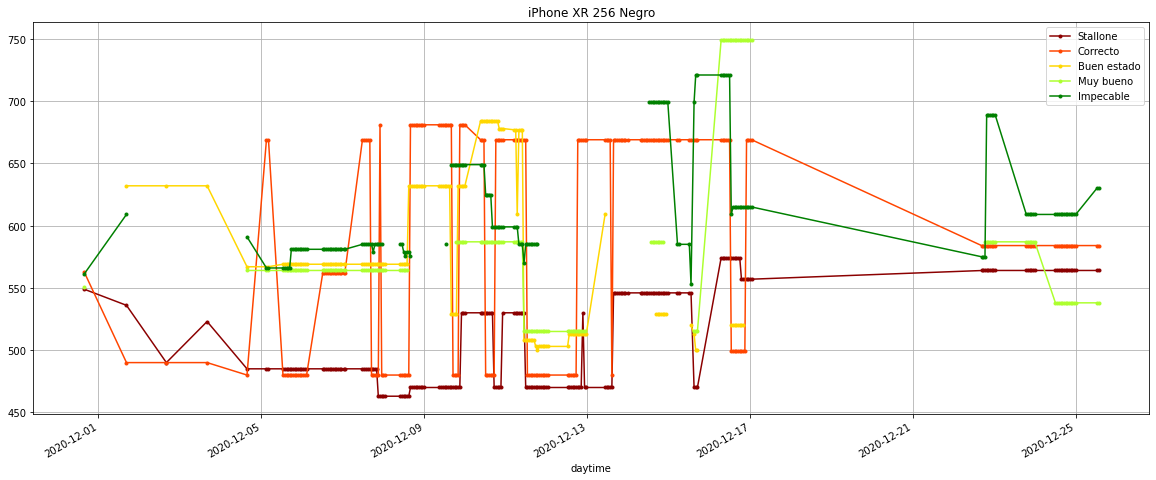

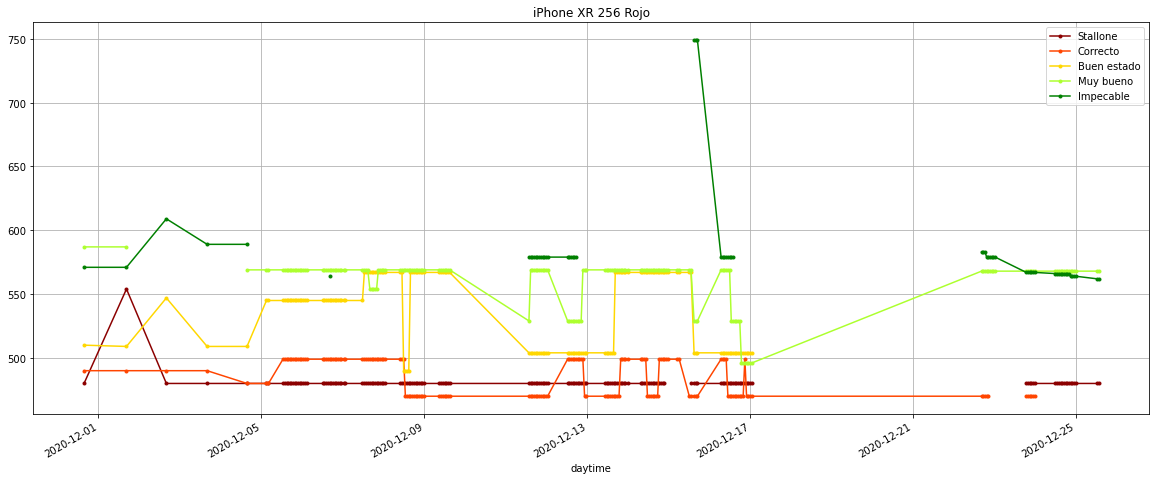

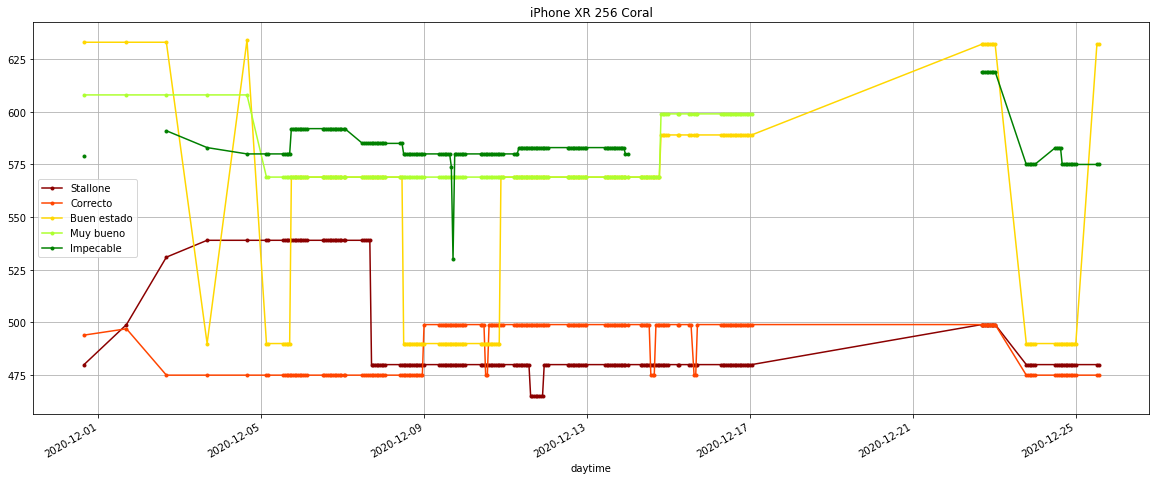

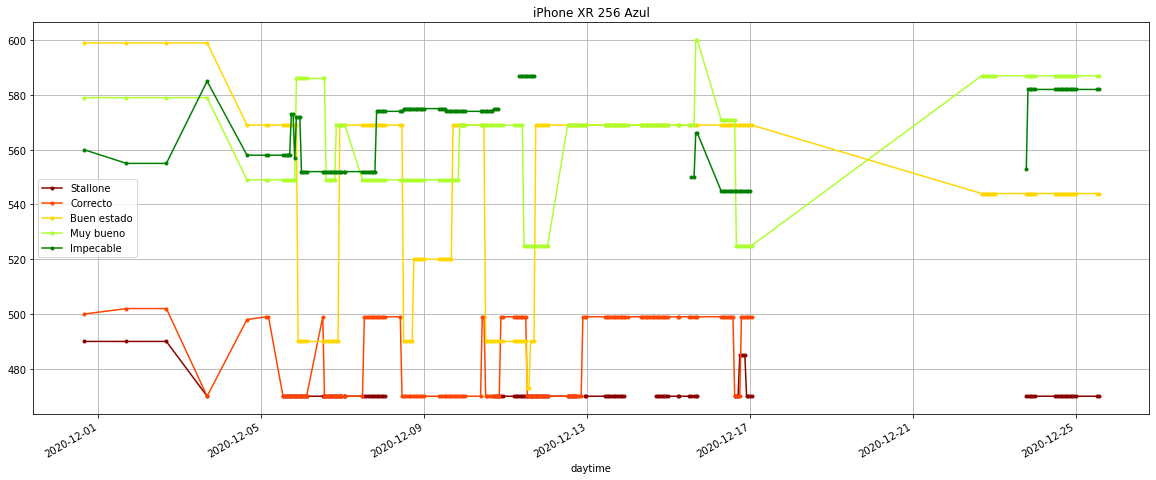

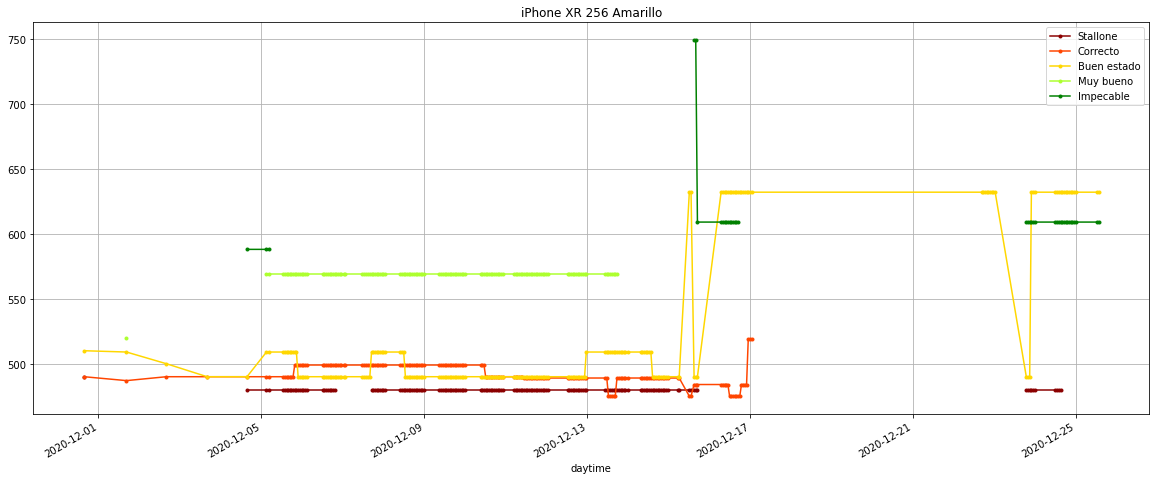

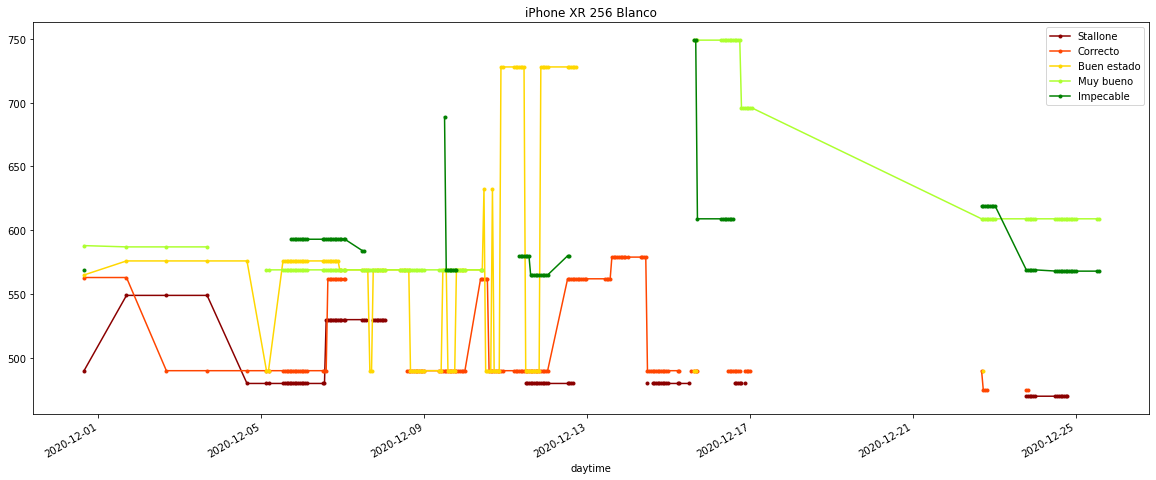

*********************************************************iPhone XS 64*********************************************************


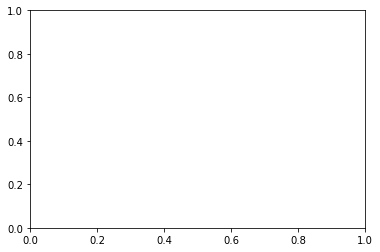

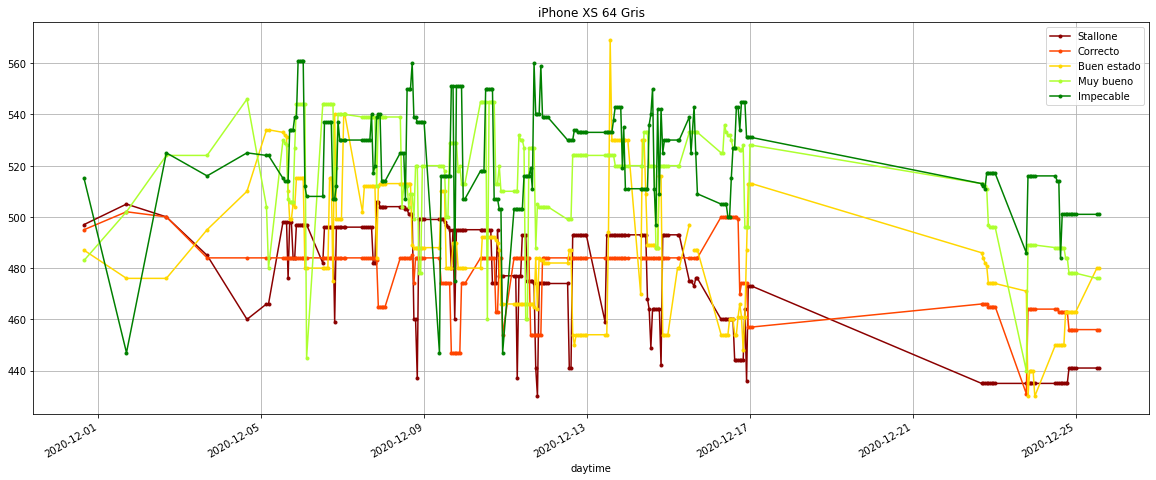

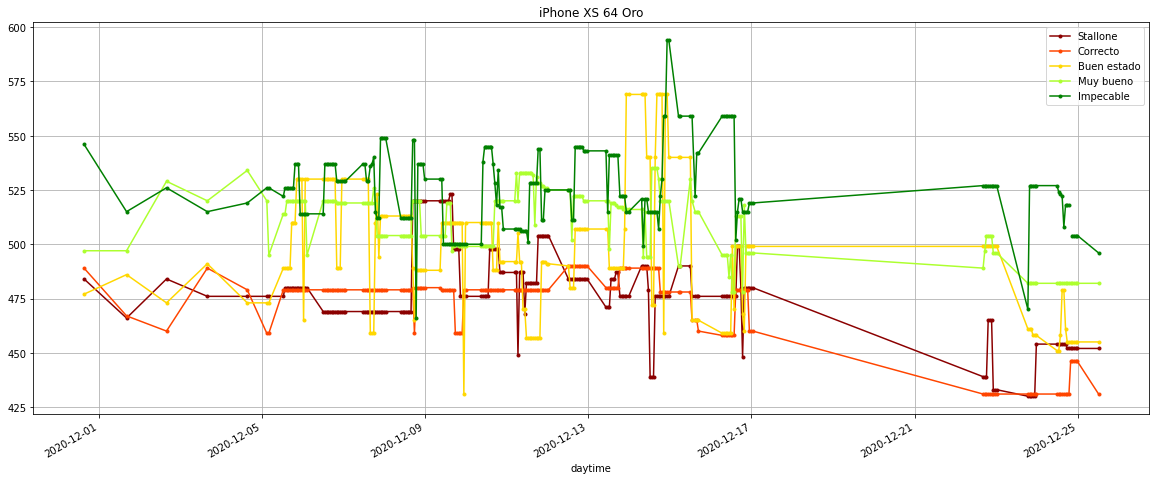

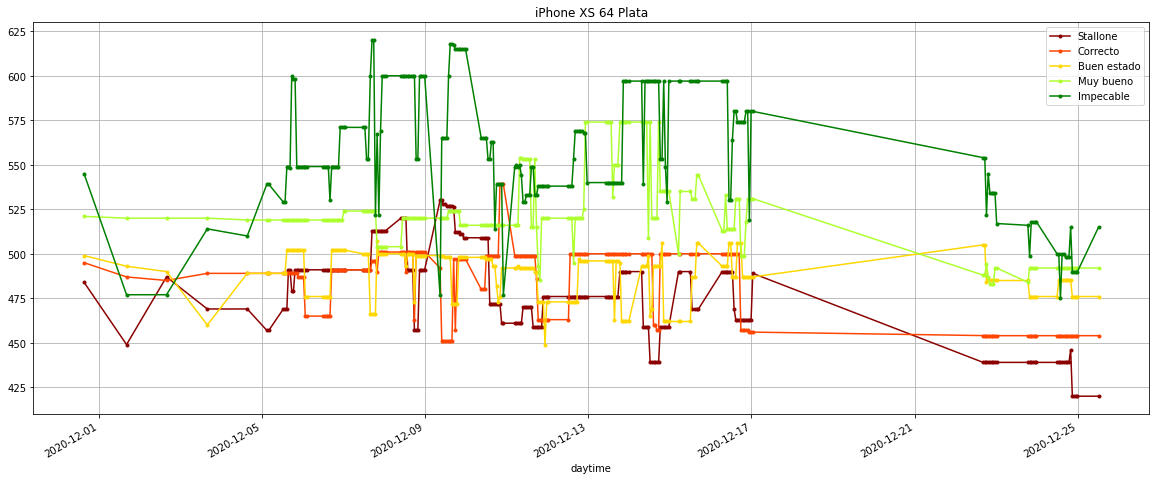

*********************************************************iPhone XS 128*********************************************************


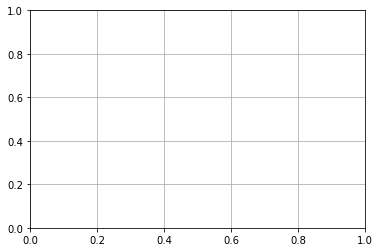

*********************************************************iPhone XS 256*********************************************************


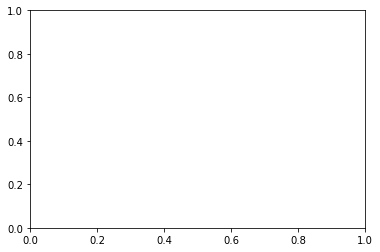

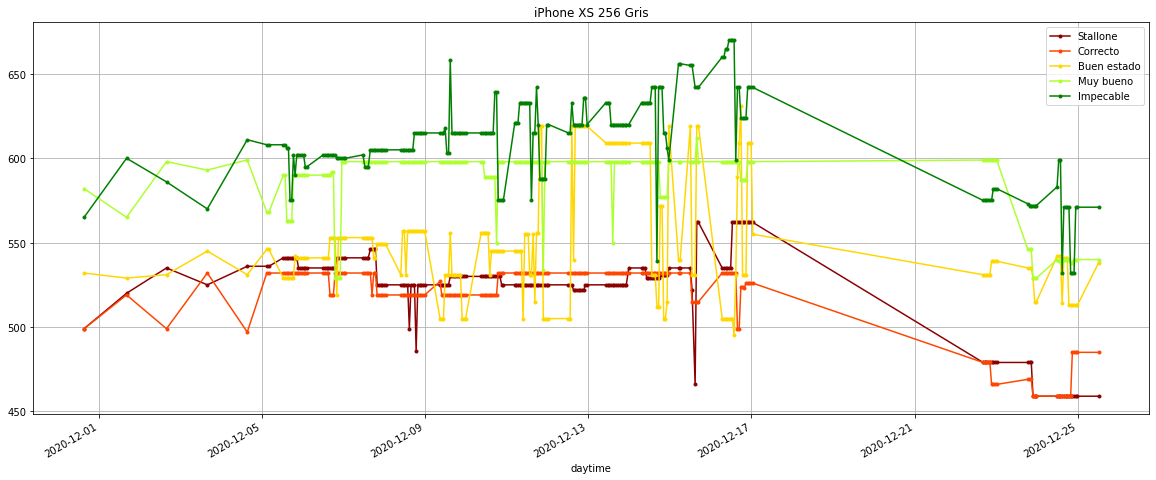

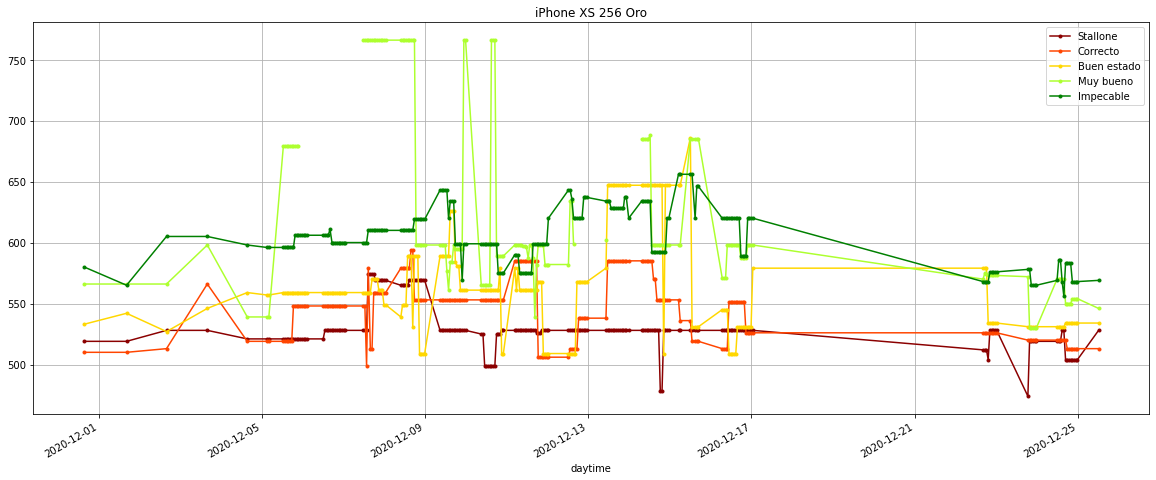

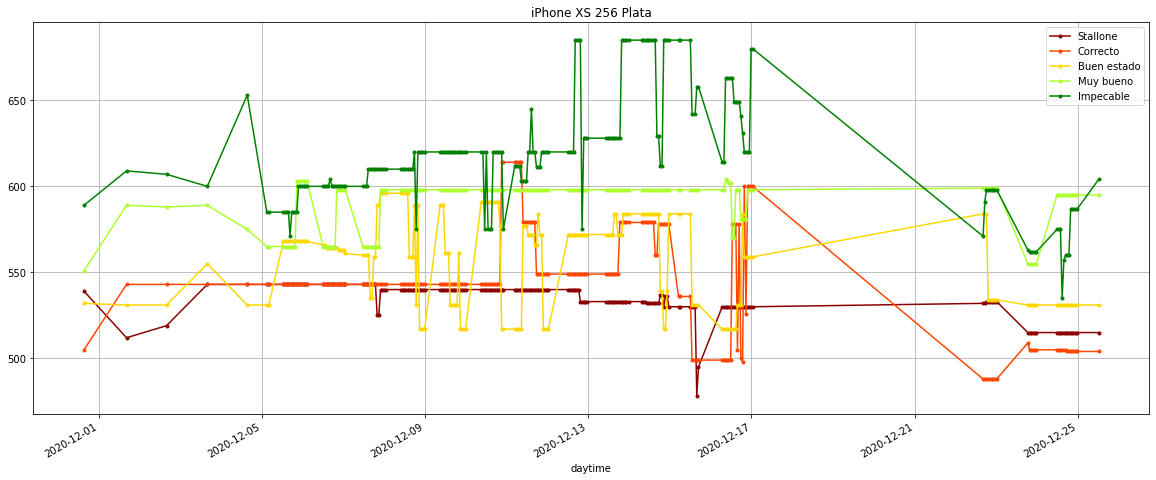

*********************************************************iPhone 11 64*********************************************************


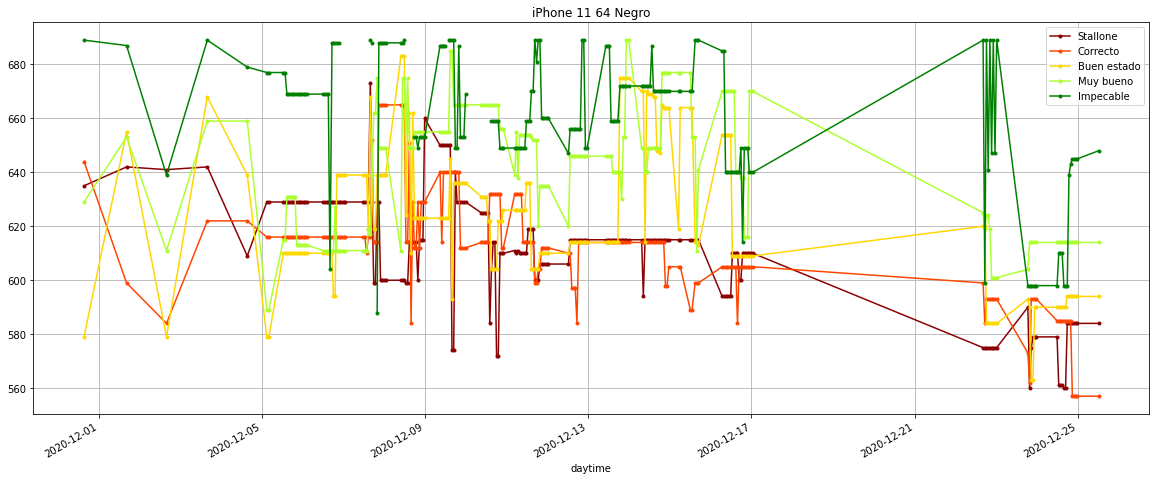

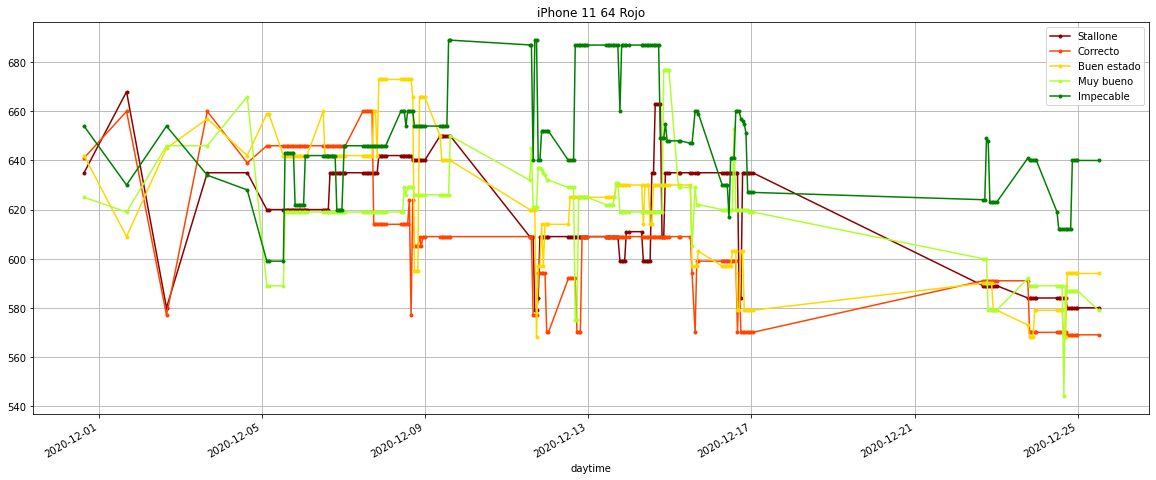

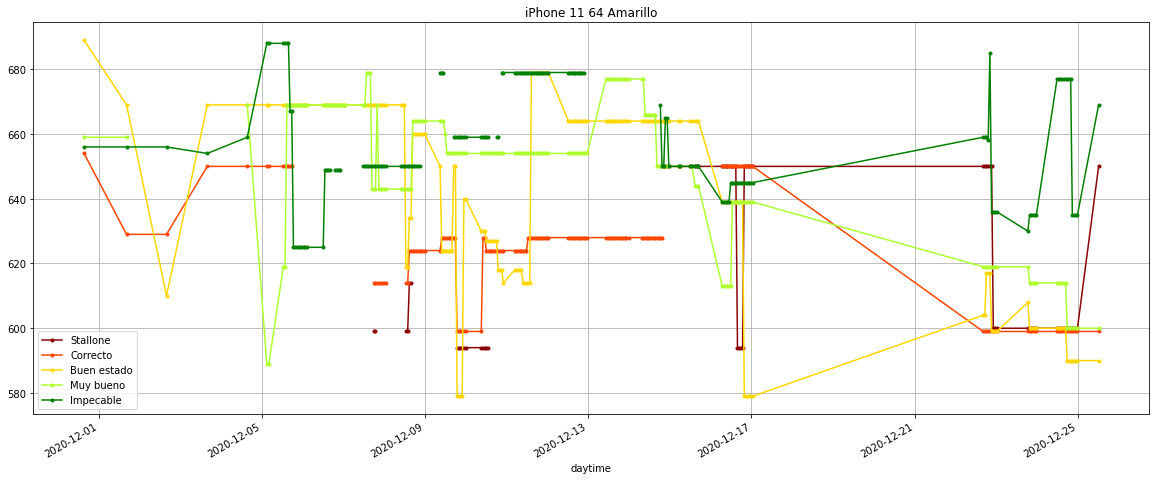

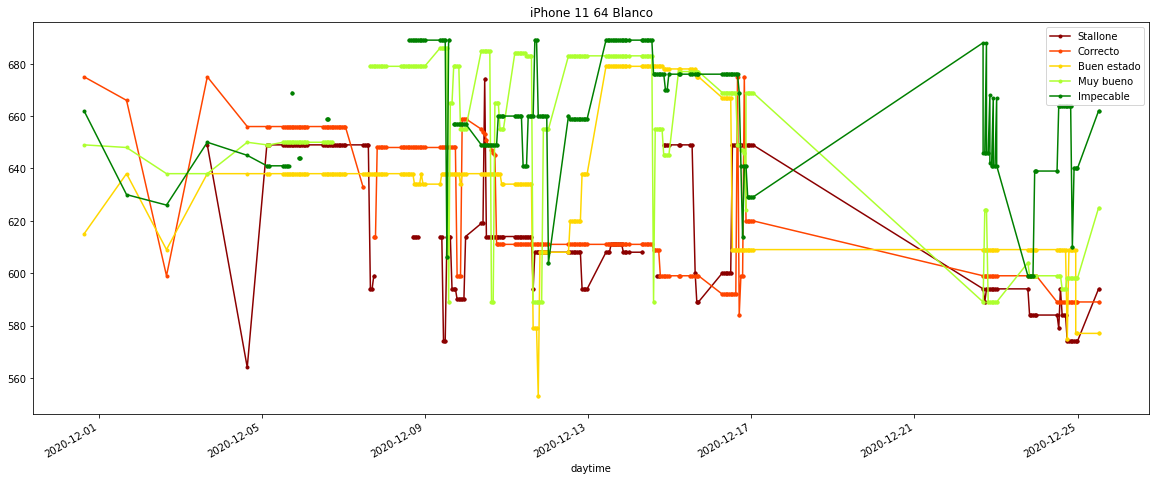

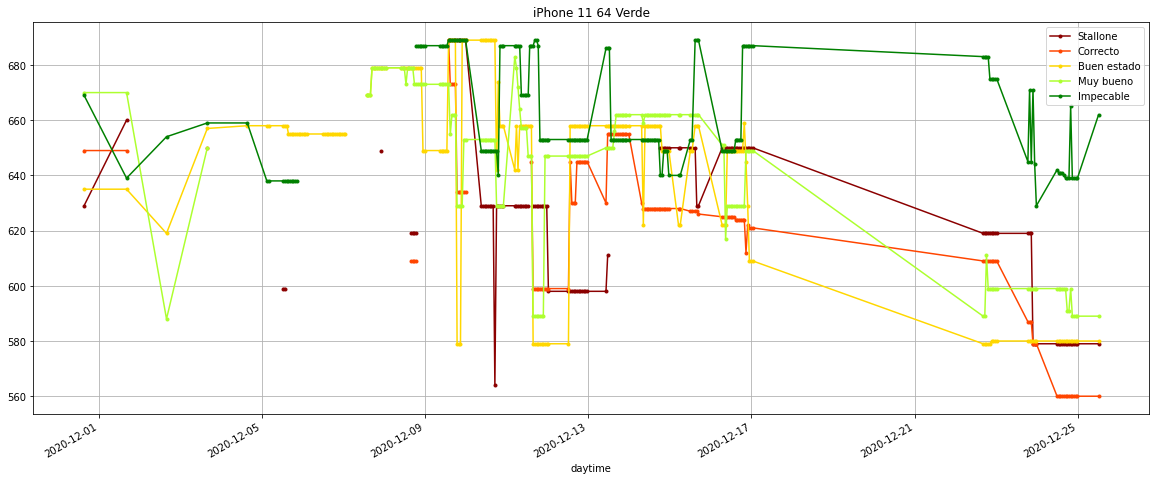

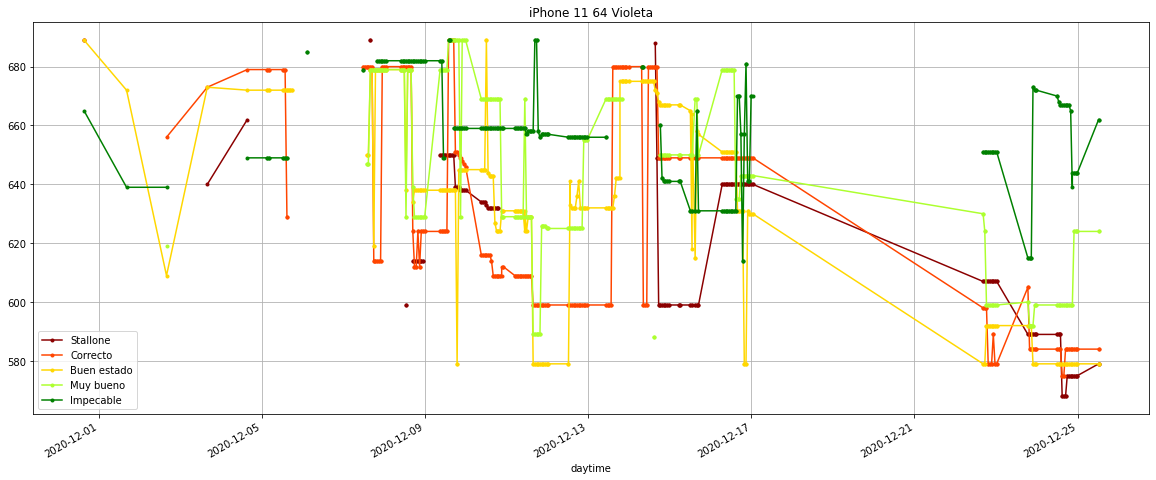

*********************************************************iPhone 11 128*********************************************************


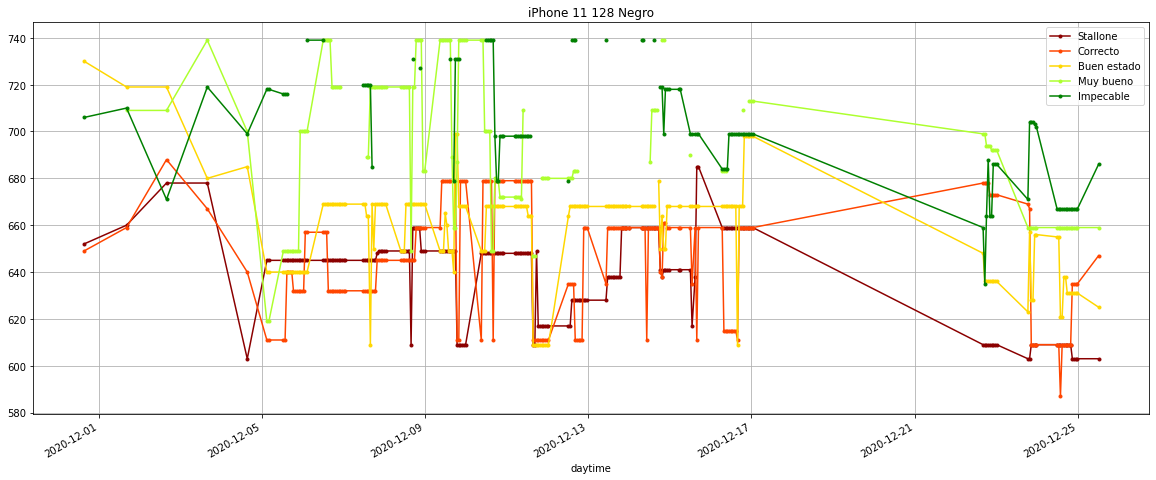

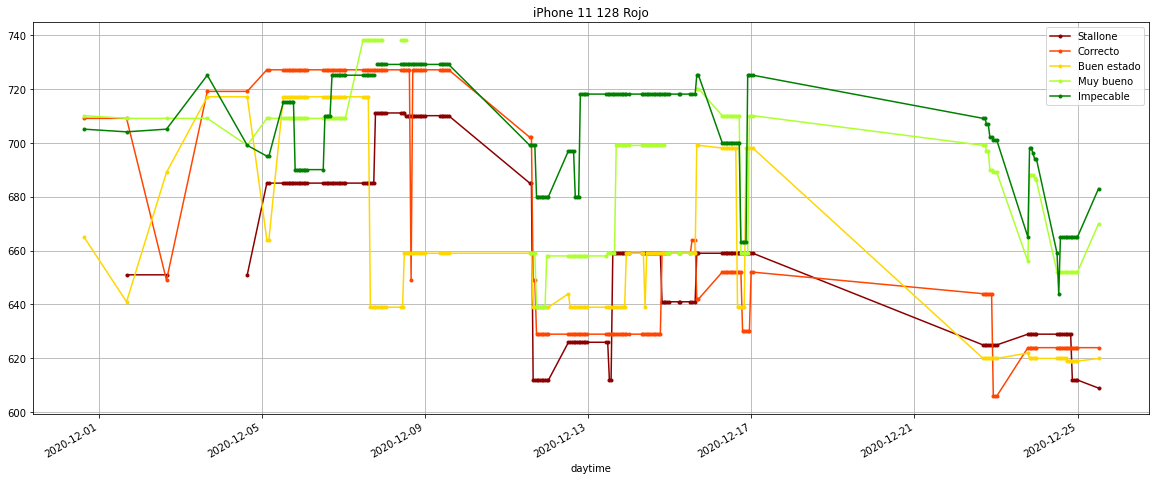

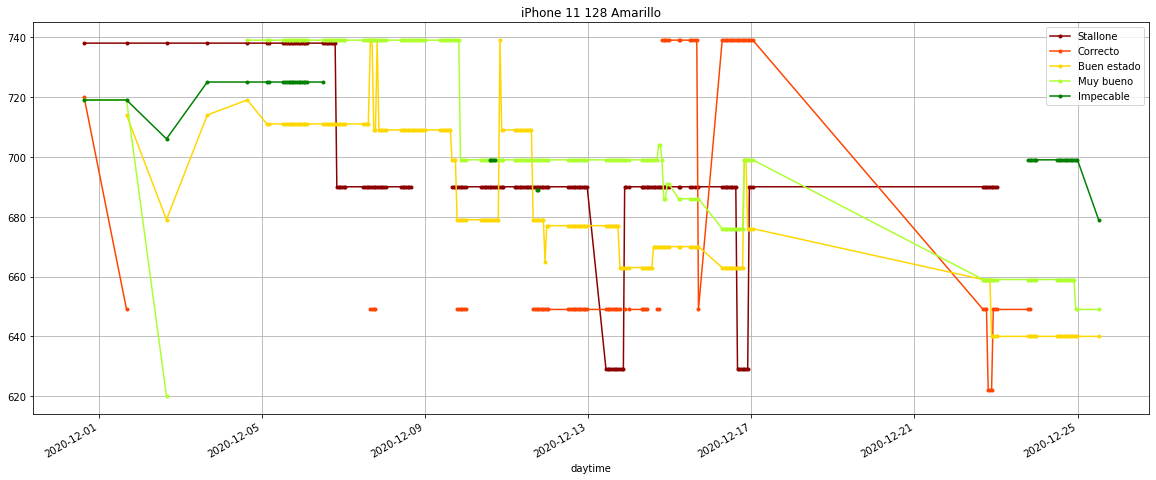

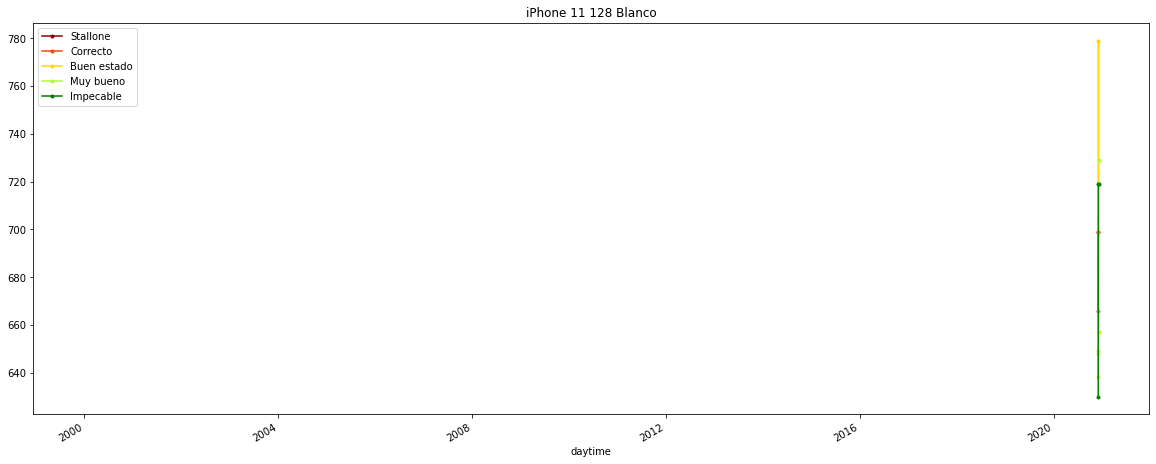

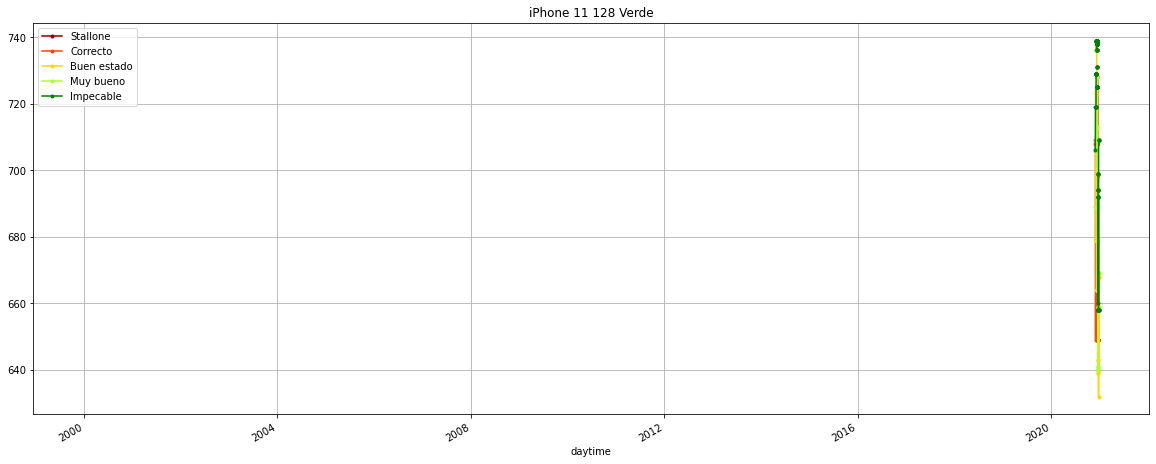

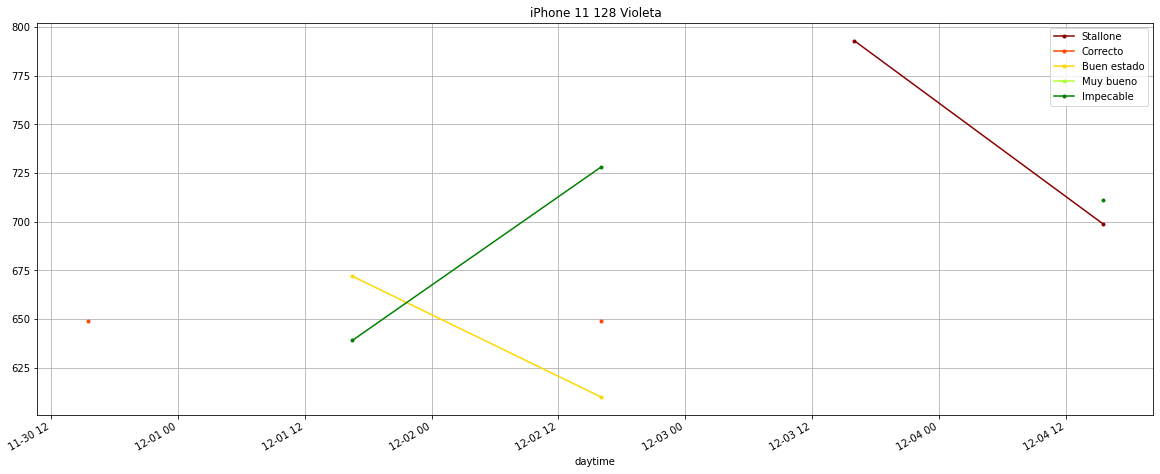

*********************************************************iPhone 11 256*********************************************************


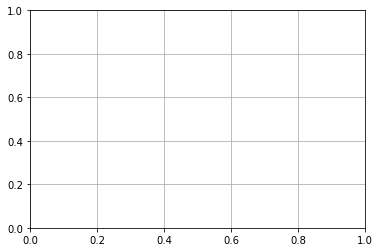

In [15]:
phones = results['phone'].unique().tolist()
memories = results['memory'].unique().tolist()
colors = results['color'].unique().tolist()

for phone in phones:
    for memory in memories:
        print(f'*********************************************************{phone} {memory}*********************************************************')
        for color in colors:
            plot(results, phone, memory, color)
            plt.grid()
    
        plt.gcf().autofmt_xdate() # Beautifyies the labels
        plt.show()

In [12]:
# results_min = pd.DataFrame(results.groupby(['phone','color','memory']).min()['price'])
# results_mean = pd.DataFrame(results.groupby(['phone','color','memory']).mean()['price'])
# results_max = pd.DataFrame(results.groupby(['phone','color','memory']).max()['price'])

# display(results_min, results_mean, results_max)